References - 
https://pythonprogramming.net/haar-cascade-face-eye-detection-python-opencv-tutorial/

https://stackoverflow.com/questions/34588464/python-how-to-capture-image-from-webcam-on-click-using-opencv 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Using GPU for hardware acceleration. Code below sourced from - https://colab.research.google.com/notebooks/gpu.ipynb to search for GPU device.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from google.colab.patches import cv2_imshow
import os

In [3]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/ME781 Project Group 25/haar cascade files/haarcascade_frontalface_alt.xml')
lefteye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/ME781 Project Group 25/haar cascade files/haarcascade_lefteye_2splits.xml')
righteye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/ME781 Project Group 25/haar cascade files/haarcascade_righteye_2splits.xml')

# Camera Capture

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
img = cv2.imread('/content/photo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    #cv2_imshow(roi_color)
    
    eye_l = lefteye_cascade.detectMultiScale(roi_gray)
    eye_r = righteye_cascade.detectMultiScale(roi_gray)

    for (ex,ey,ew,eh) in eye_l:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    for (ex,ey,ew,eh) in eye_r:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(img)

# Feature Detection

In [ ]:
path1= os.path.join('/content/drive/MyDrive/ME781 Project Group 25/dataset_new/train','Closed')
path2= os.path.join('/content/drive/MyDrive/ME781 Project Group 25/dataset_new/train','Open')

count = 0

dataset = np.zeros((617*2, 130, 130))  #617 images each in open and closed directories
labels=np.array([0]*617+[1]*617).reshape((617*2,1))  #Label 0 for closed, Label 1 for open

for img in os.listdir(path1):
    img_new=cv2.imread(os.path.join(path1,img), cv2.IMREAD_GRAYSCALE)
    img_new = cv2.resize(img_new, (130, 130))
    dataset[count] = img_new
    # cv2_imshow(img_new)

    # eye_l = lefteye_cascade.detectMultiScale(img_new)
    # eye_r = righteye_cascade.detectMultiScale(img_new)

    # if (len(eye_l) >= len(eye_r)):
    #   (x,y,w,h) = eye_l[0]
    #   roi_l = img_new[y:y+h, x:x+h]
    #   roi_l=cv2.resize(roi_l,(224,224))
    #   data_closed[count1] = roi_l

    # else:
    #   (x,y,w,h) = eye_r[0]
    #   roi_r = img_new[y:y+h, x:x+h]
    #   roi_r=cv2.resize(roi_r,(224,224))
    #   data_closed[count1] = roi_r

    count+=1

for img in os.listdir(path2):
    img_new=cv2.imread(os.path.join(path2,img), cv2.IMREAD_GRAYSCALE)
    img_new = cv2.resize(img_new, (130, 130))
    dataset[count] = img_new

    # eye_l = lefteye_cascade.detectMultiScale(img_new)
    # eye_r = righteye_cascade.detectMultiScale(img_new)

    # if (len(eye_l) >= len(eye_r)):
    #   (x,y,w,h) = eye_l[0]
    #   roi_l = img_new[y:y+h, x:x+h]
    #   roi_l=cv2.resize(roi_l,(224,224))
    #   data_closed[count1] = roi_l

    # else:
    #   (x,y,w,h) = eye_r[0]
    #   roi_r = img_new[y:y+h, x:x+h]
    #   roi_r=cv2.resize(roi_r,(224,224))
    #   data_closed[count1] = roi_r

    count+=1

print(dataset.shape)
print(labels.shape)

(1234, 130, 130)
(1234, 1)


[1]


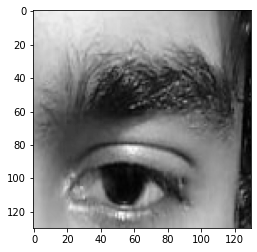

In [ ]:
from matplotlib import pyplot as plt
p=np.random.randint(0,617*2-1)
plt.imshow(dataset[p],cmap='gray')
print(labels[p])

In [ ]:
idx = np.random.permutation(len(labels))
x,y = dataset[idx], labels[idx]
X = np.expand_dims(x, axis=3)/255.0
y = np.squeeze(y,axis=1)
print(X.shape)
print(y.shape)

(1234, 130, 130, 1)
(1234,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(987, 130, 130, 1) (247, 130, 130, 1) (987,) (247,)


# Model

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(130,130,1)))  #32 filters of 3x3 size
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))   #32 filters of 3x3 size
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))  #64 filters of 3x3 size
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))   #drop with probability 1/4
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)       

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
31/31 [==============================] - 19s 597ms/step - loss: 0.4208 - accuracy: 0.7974 - val_loss: 0.2278 - val_accuracy: 0.9109
Epoch 2/10
31/31 [==============================] - 18s 591ms/step - loss: 0.1710 - accuracy: 0.9331 - val_loss: 0.2067 - val_accuracy: 0.9190
Epoch 3/10
31/31 [==============================] - 18s 589ms/step - loss: 0.1347 - accuracy: 0.9544 - val_loss: 0.1646 - val_accuracy: 0.9352
Epoch 4/10
31/31 [==============================] - 18s 593ms/step - loss: 0.1147 - accuracy: 0.9585 - val_loss: 0.1553 - val_accuracy: 0.9393
Epoch 5/10
31/31 [==============================] - 18s 592ms/step - loss: 0.0880 - accuracy: 0.9625 - val_loss: 0.1283 - val_accuracy: 0.9393
Epoch 6/10
31/31 [==============================] - 18s 588ms/step - loss: 0.0707 - accuracy: 0.9757 - val_loss: 0.1342 - val_accuracy: 0.9433
Epoch 7/10
31/31 [==============================] - 18s 591ms/step - loss: 0.0433 - accuracy: 0.9818 - val_loss: 0.1526 - val_accuracy: 0.9433

In [ ]:
model.save('/content/drive/MyDrive/ME781 Project Group 25/models/cnn1.h5', overwrite=True)

# Evaluation

In [4]:
path1= os.path.join('/content/drive/MyDrive/ME781 Project Group 25/dataset_new/test','Closed')
path2= os.path.join('/content/drive/MyDrive/ME781 Project Group 25/dataset_new/test','Open')

count = 0

test_dataset = np.zeros((109*2, 130, 130))  #617 images each in open and closed directories
test_labels=np.array([0]*109+[1]*109).reshape((109*2,1))  #Label 0 for closed, Label 1 for open

for img in os.listdir(path1):
    img_new=cv2.imread(os.path.join(path1,img), cv2.IMREAD_GRAYSCALE)
    img_new = cv2.resize(img_new, (130, 130))
    test_dataset[count] = img_new

    count+=1

for img in os.listdir(path2):
    img_new=cv2.imread(os.path.join(path2,img), cv2.IMREAD_GRAYSCALE)
    img_new = cv2.resize(img_new, (130, 130))
    test_dataset[count] = img_new
    
    count+=1

print(test_dataset.shape)
print(test_labels.shape)

(218, 130, 130)
(218, 1)


In [5]:
idx = np.random.permutation(len(test_labels))
test_x,test_y = test_dataset[idx], test_labels[idx]
test_X = np.expand_dims(test_x, axis=3)/255.0
test_y = np.squeeze(test_y,axis=1)
print(test_X.shape)
print(test_y.shape)

(218, 130, 130, 1)
(218,)


In [7]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/ME781 Project Group 25/models/cnn1.h5', custom_objects=None, compile=True, options=None)
pred = model.predict(test_X)
model.evaluate(test_X,test_y)

7/7 [==============================] - 0s 13ms/step - loss: 0.1337 - accuracy: 0.9633


[0.13366732001304626, 0.963302731513977]

In [17]:
labels = np.zeros((218))
for i in range(0,218):
  if pred[i][0]<0.5:
    labels[i]=1
  else:
    labels[i]=0

[[108   1]
 [  7 102]]


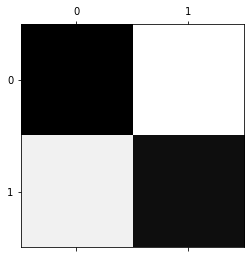

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y,labels)
print(cm)
plt.matshow(cm, cmap='binary')

# Test on images

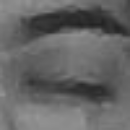

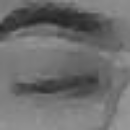

In [ ]:
img = cv2.imread('/content/photo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    #cv2_imshow(roi_gray)
    
    eye_l = lefteye_cascade.detectMultiScale(roi_gray)
    eye_r = righteye_cascade.detectMultiScale(roi_gray)

    for (ex,ey,ew,eh) in eye_l:
        eye1 = roi_gray[ey:ey+eh,ex:ex+ew]

    for (ex,ey,ew,eh) in eye_r:
        eye2 = roi_gray[ey:ey+eh,ex:ex+ew]

eye1 = cv2.resize(eye1, (130, 130))
eye2 = cv2.resize(eye2, (130, 130))

eye1 = np.expand_dims(eye1, axis=2)/255.0
eye1 = np.expand_dims(eye1,axis=0)
eye2 = np.expand_dims(eye2, axis=2)/255.0
eye2 = np.expand_dims(eye2,axis=0)

saved_model = tf.keras.models.load_model('/content/drive/MyDrive/ME781 Project Group 25/models/cnn1.h5', custom_objects=None, compile=True, options=None)

pred1 = saved_model.predict(eye1)
pred2 = saved_model.predict(eye2)
final = (pred1+pred2)/2
if final[0][0]<0.5:
  print("OPEN")
else:
  print("CLOSE")
#cv2_imshow(eye1)
#cv2_imshow(eye2)

In [ ]:
eye1 = np.expand_dims(eye1, axis=2)/255.0
eye1 = np.expand_dims(eye1,axis=0)
eye2 = np.expand_dims(eye2, axis=2)/255.0
eye2 = np.expand_dims(eye2,axis=0)

print(eye1.shape,eye2.shape)

(1, 130, 130, 1) (1, 130, 130, 1)


In [ ]:
import tensorflow as tf
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/ME781 Project Group 25/models/cnn1.h5', custom_objects=None, compile=True, options=None)

In [ ]:
pred1 = saved_model.predict(eye1)
pred2 = saved_model.predict(eye2)
final = (pred1+pred2)/2
if final[0][0]<0.5:
  print("OPEN")
else:
  print("CLOSE")

CLOSE
